# Mendelian Randomization (MR) Exercises

Welcome to this practical exercise on Two-Sample Mendelian Randomization using the `TwoSampleMR` R package. In this session, you will:

- Learn how to extract instruments
- Harmonize exposure and outcome data
- Conduct MR analyses using different methods
- Interpret MR results

The SNPs have already been selected based on LD clumping. 

We will use **Body Mass Index (BMI)** as the exposure and test for causal effects on various outcomes.

---

**Learning Objectives:**

By the end of this session, you should be able to:

- Understand what constitutes a valid genetic instrument
- Calculate and interpret F-statistics for instrument strength
- Perform MR using summary-level data
- Interpret MR estimates in the context of causality


In [1]:
suppressWarnings(library(TwoSampleMR))
library(data.table)
library(ggplot2)

TwoSampleMR version 0.5.8 
[>] New: Option to use non-European LD reference panels for clumping etc
[>] Some studies temporarily quarantined to verify effect allele
[>] See news(package='TwoSampleMR') and https://gwas.mrcieu.ac.uk for further details



You are running an old version of the TwoSampleMR package.
This version:   0.5.8
Latest version: 0.6.19
Please consider updating using remotes::install_github('MRCIEU/TwoSampleMR')



**Explanation:**

We begin by loading the required R libraries for Mendelian Randomization analysis.

- `TwoSampleMR`: the core package for performing two-sample MR
- `data.table`: for fast data manipulation
- `ggplot2`: for data visualization




## Environment setup

In [2]:
# shared tools and data folder
SHARED_PATH="/home/tch_wyd/myname/shared" # For reference database
INPUT_PATH="/home/tch_wyd/myname/inputs/MR"  # for input data


In [3]:
work_d <- path.expand("~/sysu_day6_MR")
if(!dir.exists(work_d)){dir.create(work_d)}
setwd(work_d)

ieu_a_2_rds <- paste0(INPUT_PATH, "/ieu-a-2.rds")
ieu_a_7_out_rds <- paste0(INPUT_PATH, "/ieu-a-7-out.rds")

### Step 1: Load BMI Exposure Data

We use BMI as our exposure. Normally, you'd extract genome-wide significant SNPs using `extract_instruments()`, but here we use a pre-downloaded dataset.




In [4]:
# Use BMI as exposure variable

#bmi_exp_dat <- extract_instruments(outcomes ="ieu-a-2")
bmi_exp_dat <- readRDS(ieu_a_2_rds)
bmi_exp_dat


pval.exposure,samplesize.exposure,chr.exposure,se.exposure,beta.exposure,pos.exposure,id.exposure,SNP,effect_allele.exposure,other_allele.exposure,eaf.exposure,exposure,mr_keep.exposure,pval_origin.exposure,data_source.exposure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<chr>
2.18198e-08,339152,1,0.0030,-0.0168,47684677,ieu-a-2,rs977747,G,T,0.5333,Body mass index || id:ieu-a-2,TRUE,reported,igd
4.56773e-11,339065,1,0.0031,0.0201,78048331,ieu-a-2,rs17381664,C,T,0.4250,Body mass index || id:ieu-a-2,TRUE,reported,igd
5.05941e-14,313621,1,0.0087,0.0659,110082886,ieu-a-2,rs7550711,T,C,0.0339,Body mass index || id:ieu-a-2,TRUE,reported,igd
5.45205e-10,338768,1,0.0029,0.0181,201784287,ieu-a-2,rs2820292,C,A,0.5083,Body mass index || id:ieu-a-2,TRUE,reported,igd
1.88018e-28,338123,1,0.0030,0.0331,72837239,ieu-a-2,rs7531118,C,T,0.6083,Body mass index || id:ieu-a-2,TRUE,reported,igd
2.28718e-40,339078,1,0.0037,0.0497,177889480,ieu-a-2,rs543874,G,A,0.2667,Body mass index || id:ieu-a-2,TRUE,reported,igd
2.12324e-13,318585,1,0.0031,-0.0227,49589847,ieu-a-2,rs657452,G,A,0.5833,Body mass index || id:ieu-a-2,TRUE,reported,igd
1.43384e-13,337797,1,0.0030,0.0221,96924097,ieu-a-2,rs11165643,T,C,0.5750,Body mass index || id:ieu-a-2,TRUE,reported,igd
4.97794e-08,339157,2,0.0038,0.0209,164567689,ieu-a-2,rs1460676,C,T,0.2167,Body mass index || id:ieu-a-2,TRUE,reported,igd


**Explanation:**

Here, we load BMI exposure data from a pre-saved RDS file. Normally, you'd use `extract_instruments()` to pull data from the MR-Base database.


**Question:**
- How many SNPs are included in this dataset?
- What are the main columns, and what do they represent (e.g., beta, se, p-values?)?

### Step 1b: Load outcome summary stats



In [5]:
# Use Coronary heart disease as outcome variable
chd_out_dat <- readRDS(ieu_a_7_out_rds)
chd_out_dat

,SNP,chr,pos,beta.outcome,se.outcome,samplesize.outcome,pval.outcome,eaf.outcome,effect_allele.outcome,other_allele.outcome,outcome,id.outcome,originalname.outcome,outcome.deprecated,mr_keep.outcome,data_source.outcome
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,rs977747,1,47684677,-0.013896,0.0096146,184305,1.48375e-01,0.550761,G,T,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
2,rs17203016,2,208255518,0.020352,0.0122315,184305,9.61324e-02,0.186737,G,A,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
3,rs7550711,1,110082886,-0.048354,0.0305635,184305,1.13631e-01,0.027650,T,C,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
4,rs9374842,6,120185665,0.013555,0.0106053,184305,2.01203e-01,0.723965,T,C,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
5,rs4740619,9,15634326,-0.006546,0.0092497,184305,4.79131e-01,0.467784,C,T,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
6,rs2112347,5,75015242,-0.005855,0.0096581,184305,5.44364e-01,0.401399,G,T,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
7,rs3817334,11,47650993,0.000355,0.0095386,184305,9.70312e-01,0.387831,T,C,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
8,rs10840100,11,8669437,0.014599,0.0095234,184305,1.25286e-01,0.607618,G,A,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd
9,rs11030104,11,27684517,-0.027672,0.0109855,184305,1.17704e-02,0.221599,G,A,Coronary heart disease || id:ieu-a-7,ieu-a-7,Coronary heart disease,Coronary heart disease || ||,TRUE,igd


**Explanation:**

Here, we load the outcome data from a pre-saved RDS file. The SNPs have been extracted based on the selection from the exposure


**Question:**
- How many SNPs are included in this dataset and will it alway be the same as the exposure?
- Is there anything you can do if a SNP is not present in the outcome summary stats ?


### Step 2: Harmonize Exposure and Outcome Data

To ensure valid causal inference, the exposure and outcome datasets must be aligned on allele coding.

**Question:**
- Why is harmonization necessary in two-sample MR?
- What could go wrong if harmonization is skipped or misapplied?


In [6]:
# Harmonize data
dat <- harmonise_data(bmi_exp_dat, chd_out_dat)
dat
#saveRDS(dat, "MR_huanhuan.harmonized.rds")

Harmonising Body mass index || id:ieu-a-2 (ieu-a-2) and Coronary heart disease || id:ieu-a-7 (ieu-a-7)



,SNP,effect_allele.exposure,other_allele.exposure,effect_allele.outcome,other_allele.outcome,beta.exposure,beta.outcome,eaf.exposure,eaf.outcome,remove,⋯,se.exposure,pos.exposure,id.exposure,exposure,mr_keep.exposure,pval_origin.exposure,data_source.exposure,action,SNP_index,mr_keep
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<int>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<int>,<lgl>
1,rs1000940,G,A,G,A,0.0184,-0.014538,0.2250,0.337103,FALSE,⋯,0.0033,5283252,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
2,rs10132280,A,C,A,C,-0.0221,-0.012169,0.3333,0.282164,FALSE,⋯,0.0033,25928179,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
3,rs1016287,C,T,C,T,-0.0228,-0.014087,0.6750,0.699031,FALSE,⋯,0.0033,59305625,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
4,rs10182181,G,A,G,A,0.0309,0.018295,0.5000,0.473525,FALSE,⋯,0.0029,25150296,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
5,rs10733682,G,A,G,A,-0.0188,-0.004541,0.5750,0.491116,FALSE,⋯,0.0030,129460914,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
6,rs10840100,G,A,G,A,0.0206,0.014599,0.7250,0.607618,FALSE,⋯,0.0030,8669437,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
7,rs11030104,G,A,G,A,-0.0416,-0.027672,0.2000,0.221599,FALSE,⋯,0.0037,27684517,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
8,rs11057405,A,G,A,G,-0.0304,0.013737,0.0917,0.081810,FALSE,⋯,0.0053,122781897,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE
9,rs11165643,T,C,T,C,0.0221,0.005150,0.5750,0.553284,FALSE,⋯,0.0030,96924097,ieu-a-2,Body mass index || id:ieu-a-2,TRUE,reported,igd,2,1,TRUE


**Explanation:**

We now harmonize the exposure and outcome datasets to ensure allele alignment. This is critical for unbiased MR estimates.

**Question:**
- What types of allele mismatches can occur?
- How does the function handle strand ambiguities?

### check hamonization

If the harmonization went well then the allele frequencies (AF) should be similar between the outcome and exposure summaries

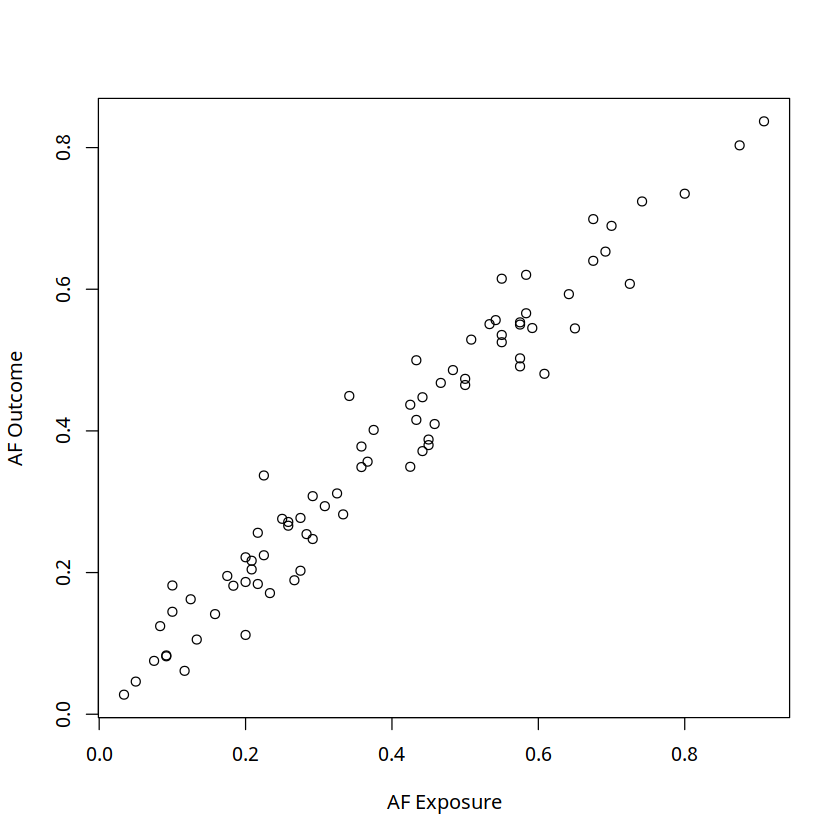

In [7]:

plot(dat$eaf.exposure,dat$eaf.outcome,ylab="AF Outcome",xlab="AF Exposure")


 - What would it look like if the data was not correctl harmonized?

### performing the MR


The `mr()` function performs multiple MR methods using the harmonized dataset `dat`, which contains SNP–exposure and SNP–outcome associations.



##### Methods Used

1. **Inverse-Variance Weighted (IVW)**

Assumes all SNPs are valid instruments (no pleiotropy).

$
\hat{\beta}_{\text{IVW}} = \frac{\sum_{j} w_j \cdot \hat{\beta}_{Yj} / \hat{\beta}_{Xj}}{\sum_{j} w_j}
\quad \text{where} \quad
w_j = \frac{1}{\text{SE}^2_{Yj}}
$

2. **MR-Egger Regression**

Allows for directional pleiotropy:

$
\hat{\beta}_{Yj} = \alpha + \beta_{\text{Egger}} \cdot \hat{\beta}_{Xj} + \epsilon_j
$

- \( \alpha \): intercept (tests for pleiotropy)
- \( \beta_{\text{Egger}} \): causal effect

3. **Weighted Median**

Gives a consistent estimate if >50% of SNPs are valid:

$
\hat{\beta}_{j} = \frac{\hat{\beta}_{Yj}}{\hat{\beta}_{Xj}}
$
and takes the **weighted median**.

4. **Weighted and Simple Mode**

Clusters SNPs with similar causal estimates and uses the mode (The mode of the above $\hat{\beta}_{j}$s ).


**Question:**
- What are the estimated causal effects?
- Which methods are more robust to pleiotropy?


In [8]:
# Perform MR
res <- mr(dat)
res


Analysing 'ieu-a-2' on 'ieu-a-7'



id.exposure,id.outcome,outcome,exposure,method,nsnp,b,se,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,MR Egger,79,0.5024935,0.14396056,8.012590e-04
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,Weighted median,79,0.3870065,0.07382293,1.585346e-07
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,Inverse variance weighted,79,0.4459091,0.05898302,4.032020e-14
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,Simple mode,79,0.3401554,0.14308165,1.988727e-02
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,Weighted mode,79,0.3888249,0.10221148,2.812666e-04


### Step 3: Interpret MR Results

**Question 3:**
- What are the causal effect estimates from each MR method?
- Are they consistent?
- Which method would you trust most here, and why?


### F-statistic:
In Mendelian Randomization (MR), the **F‑statistic** assesses whether genetic variants (instruments) are **strongly associated with the exposure**.  
A common rule‑of‑thumb is:

- **F > 10** → instrument is considered *strong*  
- **F ≤ 10** → potential *weak‑instrument bias*

#### Formula for Summary‑Level (Two‑Sample) MR

For each single‑nucleotide polymorphism (SNP):

$F_j \;=\; \frac{\beta_{X,j}^{2}}{\mathrm{SE}_{\beta_{X,j}}^{2}}$

where  

- $\beta_{X,j}$ is the SNP’s estimated effect on the exposure  
- $\mathrm{SE}_{\beta_{X,j}}$ is its standard error  

For *K* SNPs, the **mean F** is

$\bar{F} \;=\; \frac{1}{K} \sum_{j=1}^{K} F_j $


In [9]:

beta = bmi_exp_dat$beta.exposure
sebeta = bmi_exp_dat$se.exposure
F   = beta^2/sebeta^2
mean(F)


[1] 65.56503

 - if the F was below 10 what could you do?
 

### plotting the results

$`ieu-a-2.ieu-a-7`

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1     ieu-a-2    ieu-a-7

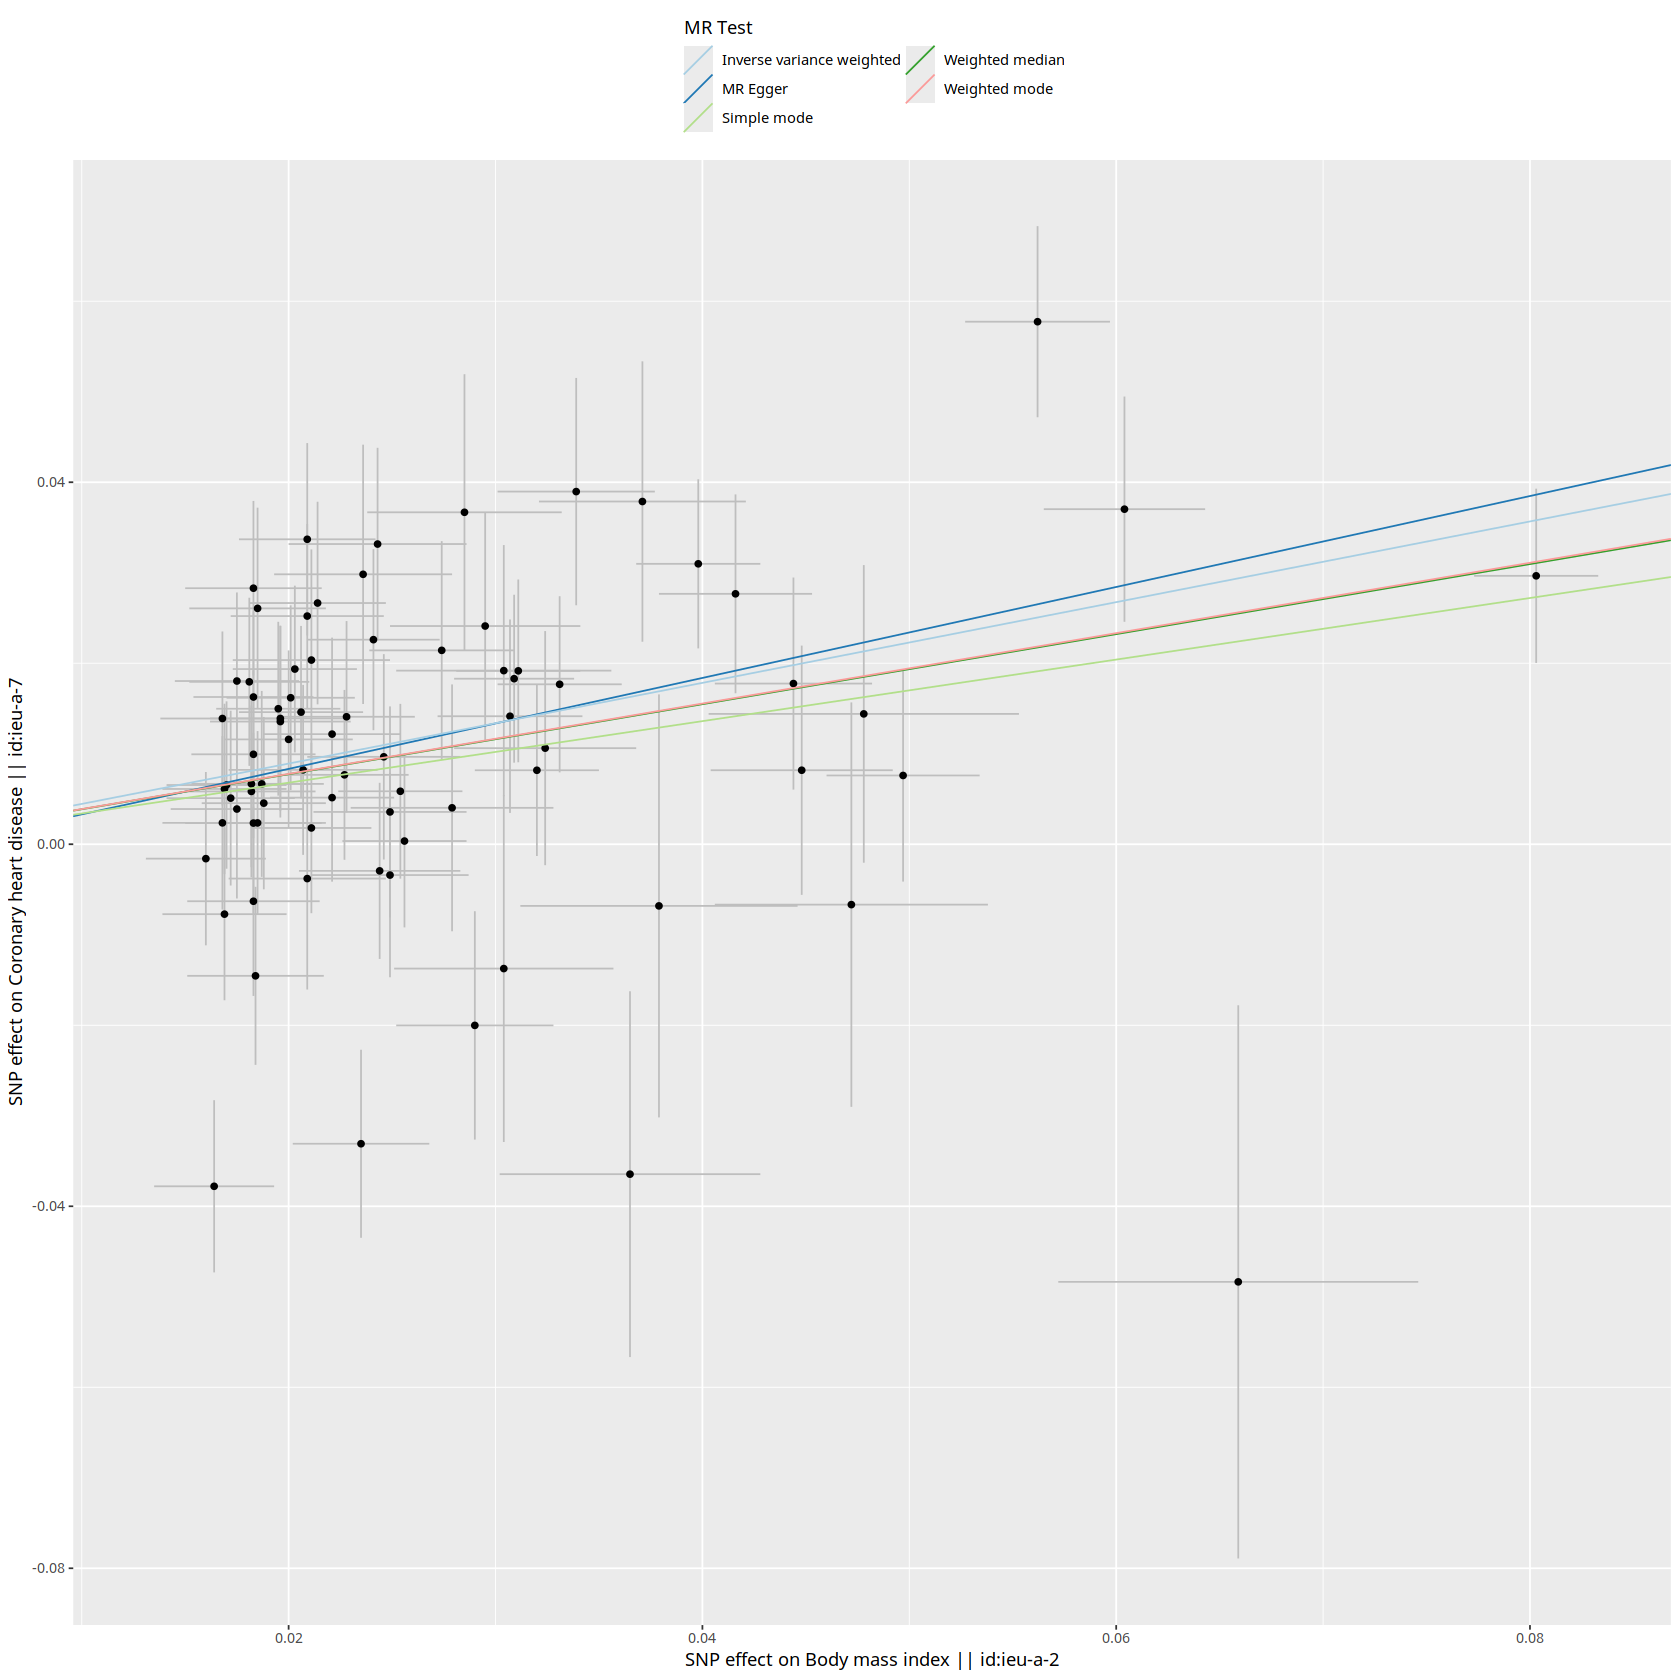

In [10]:
# Scatter plot
options(repr.plot.width = 14, repr.plot.height = 14) #make plot bigger
mr_scatter_plot(res, dat)



**Explanation:**

In the plot we visualize the MR results using scatter plot of the effect size and its SE for each SNP. 

**Question:**
- What do the visualizations tell you about the direction and consistency of the MR estimate?
- Do you se signs of heterogenerity?
- Do all of the SNPs have a significant effect on CHD?



### testing for pleiotrypy



The function `mr_pleiotropy_test(dat)` is used to detect **directional horizontal pleiotropy** in MR analyses by estimating the **intercept** of an **MR-Egger regression**.

The purpuse is to test whether SNPs affect the outcome **through pathways other than the exposure**, violating a key MR assumption.

- **Vertical pleiotropy**: SNP affects the outcome **only through the exposure** → OK for MR.
- **Horizontal pleiotropy**: SNP affects the outcome **through an alternative pathway** → Violates MR assumptions.


The MR-Egger model regresses the SNP–outcome effects on the SNP–exposure effects, allowing for an **intercept** $ \alpha $:

$
\hat{\beta}_{Yj} = \alpha + \beta_{\text{Egger}} \cdot \hat{\beta}_{Xj} + \epsilon_j
$

Where:
- $ \hat{\beta}_{Yj} $: SNP–outcome effect  
- $ \hat{\beta}_{Xj} $: SNP–exposure effect  
- $ \beta_{\text{Egger}} $: causal estimate  
- $ \alpha $: **intercept** → represents average pleiotropic effect

`mr_pleiotropy_test()` tests the null hypothesis:

$H_0: \alpha = 0$

- If $ \alpha = 0 $: No **directional pleiotropy** → MR estimates are likely unbiased.  
- If $ \alpha \ne 0 $: Evidence of **directional pleiotropy** → MR estimates may be biased.


In [11]:

###Horizontal pleiotropy:
mr_pleiotropy_test(dat)

id.exposure,id.outcome,outcome,exposure,egger_intercept,se,pval
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,-0.001719304,0.003985962,0.6674266


**Explanation:**

We now assess assumptions of the MR analysis by checking for horizontal pleiotropy .

**Question:**
- Why is horizontal pleiotropy problematic in MR?
- Do you identify horizontal pleiotropy in this data?


### testing for heterogenerity



The function `mr_heterogeneity(dat)` tests for **heterogeneity** in the Mendelian Randomization (MR) effect estimates across SNPs.  
This is similar to testing whether all SNPs provide **consistent causal estimates**, as expected under the assumption of valid instruments.



We want to evaluate whether **some SNPs have different causal effects** than others — which could indicate:

- Invalid instruments
- Horizontal pleiotropy
- Heterogeneous effects due to biology or bias

`mr_heterogeneity()` calculates **Cochran’s Q statistic**, commonly used in meta-analysis to test for heterogeneity across effect estimates.

#### For IVW:

$
Q = \sum_{j} \frac{(\hat{\beta}_{Yj} - \hat{\beta}_{Xj} \cdot \hat{\beta}_{\text{IVW}})^2}{\text{SE}_{Yj}^2}
$

Where:
- $ \hat{\beta}_{Yj} $: SNP–outcome effect  
- $ \hat{\beta}_{Xj} $: SNP–exposure effect  
- $ \hat{\beta}_{\text{IVW}} $: pooled MR estimate (from IVW)  
- $ \text{SE}_{Yj} $: standard error of SNP–outcome effect  

This is compared to a **chi-squared distribution** with $ k - 1 $ degrees of freedom (where $ k $ = number of SNPs).


In [12]:

###Heterogeneity:
mr_heterogeneity(dat)



id.exposure,id.outcome,outcome,exposure,method,Q,Q_df,Q_pval
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,MR Egger,143.3046,77,6.841585e-06
ieu-a-2,ieu-a-7,Coronary heart disease || id:ieu-a-7,Body mass index || id:ieu-a-2,Inverse variance weighted,143.6508,78,8.728420e-06




**Question:**
- What does a significant heterogeneity test imply?
- Why might SNPs show heterogeneous causal estimates?
- How could you proceed if you detect heterogeneity in your instruments?


### Additional robustness checks

#### effect of each snp

#### 🌲 Forest Plot: Single-SNP MR Estimates

We now generate a **forest plot** to visualize the **causal effect estimate from each SNP individually**.



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_errorbarh()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


$`ieu-a-2.ieu-a-7`

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1     ieu-a-2    ieu-a-7

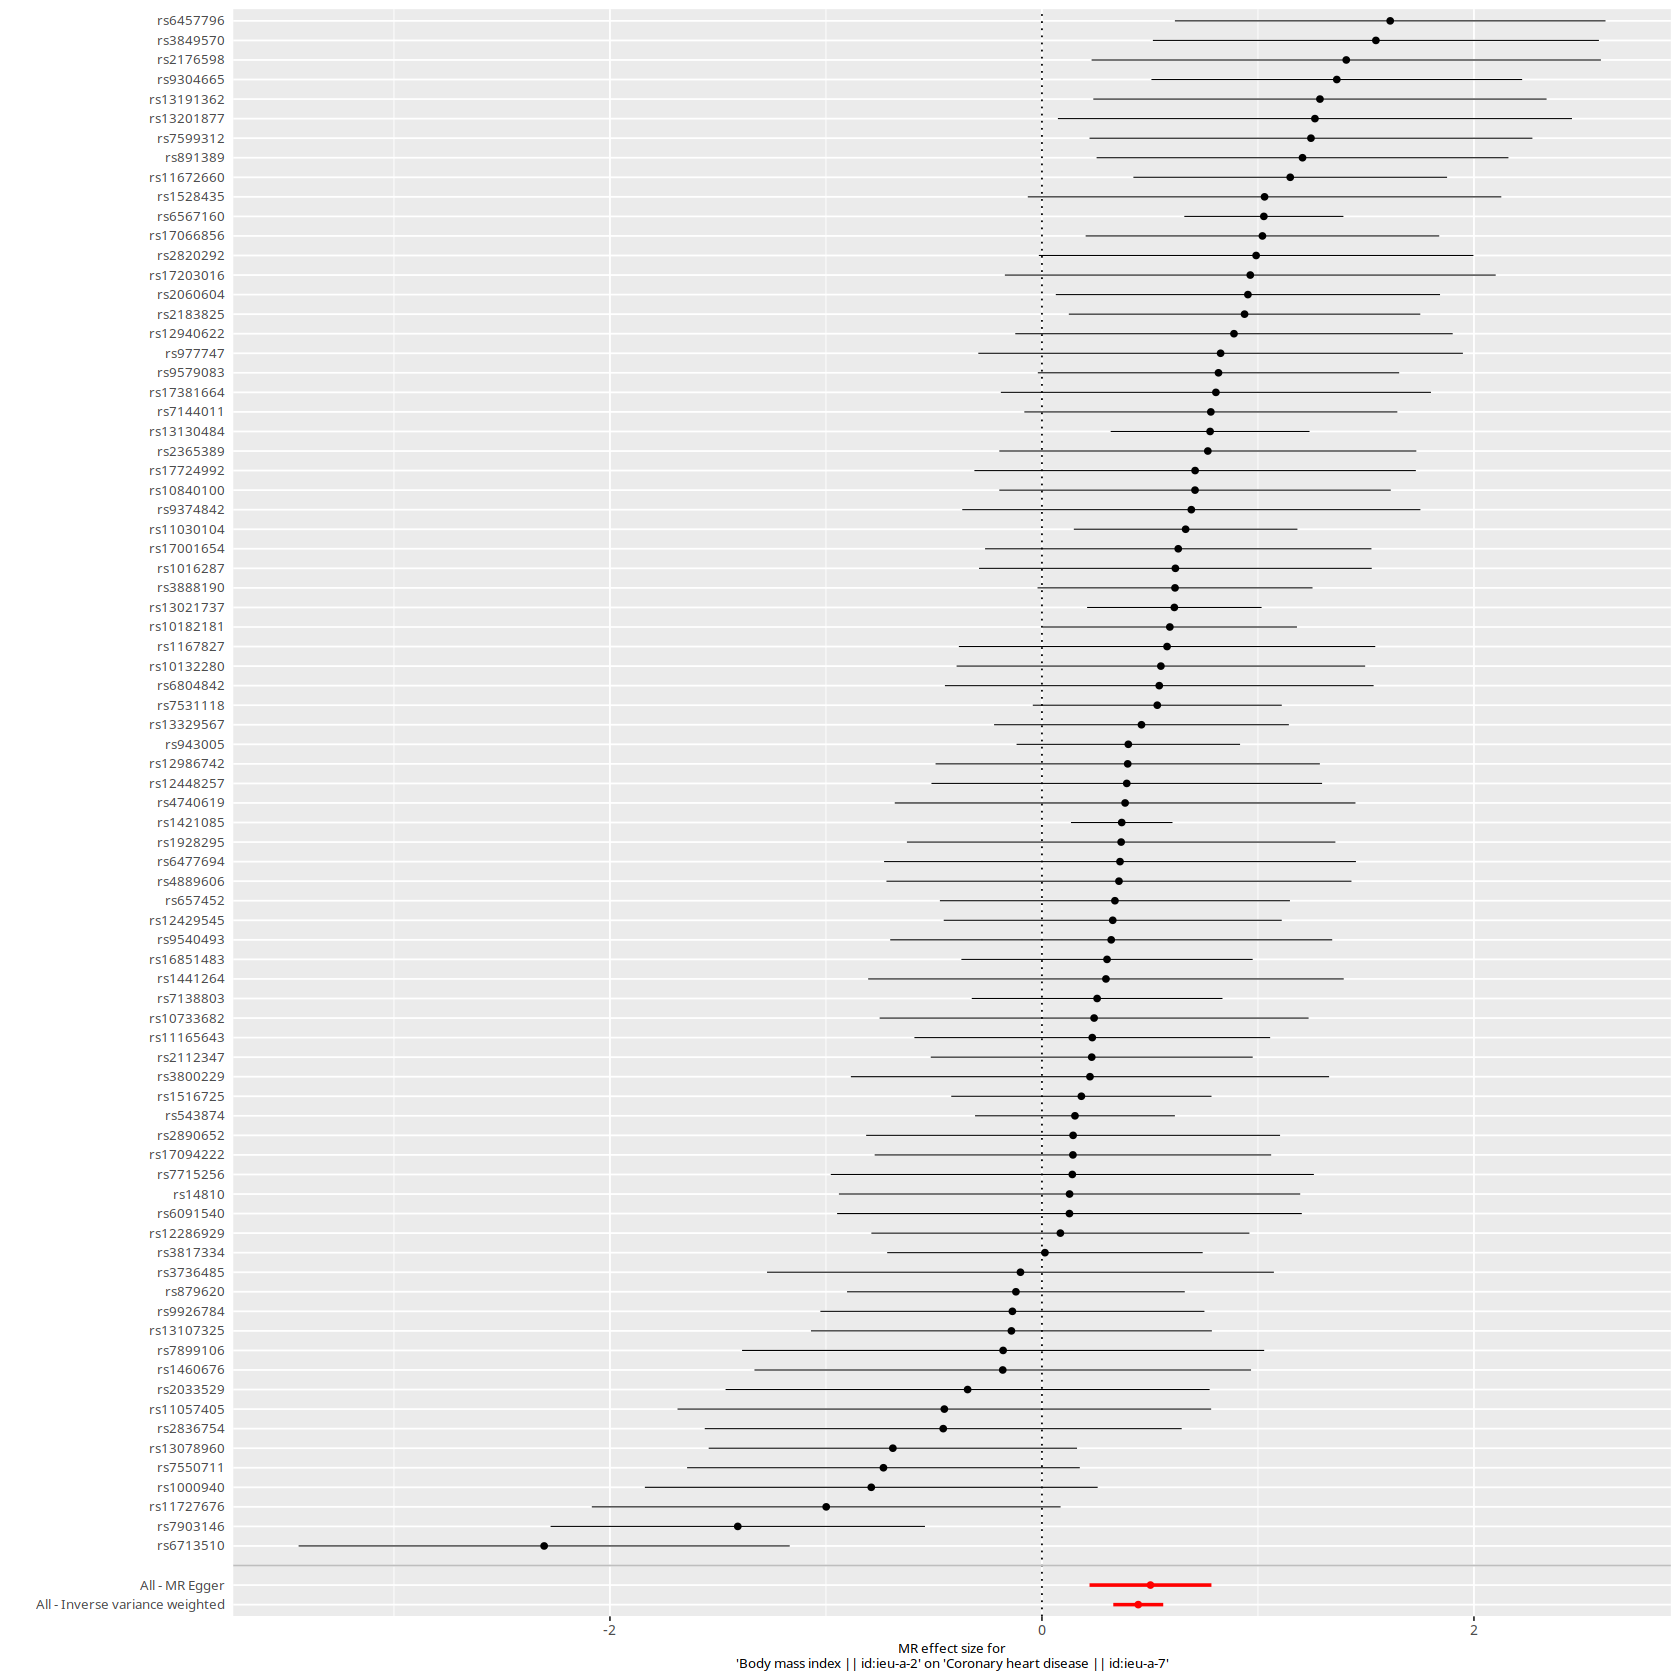

In [13]:

# Forest plot
res_single <- mr_singlesnp(dat)
mr_forest_plot(res_single)




**Question:**
- What do the visualizations tell you about the direction and consistency of the MR estimate?
- Do the individual SNPs provide consistent evidence for a causal effect?
- Are there any SNPs that appear to contradict the overall MR estimate?
- How could you follow up on SNPs that look like outliers?





####  Leave‑One‑Out (LOO) Sensitivity Analysis

We will perform a **leave‑one‑out (LOO)** analysis to check whether the overall MR result is **driven by any single SNP**.

#### What does `mr_leaveoneout()` do?

1. **Iteratively removes** one SNP at a time from the instrument set.  
2. Re‑calculates the **IVW causal estimate** on the remaining $k-1$ SNPs.  
3. Stores the new estimate $ \hat\beta_{(-j)} $ and its 95 % CI for each SNP $ j $.


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_errorbarh()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


$`ieu-a-2.ieu-a-7`

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1     ieu-a-2    ieu-a-7

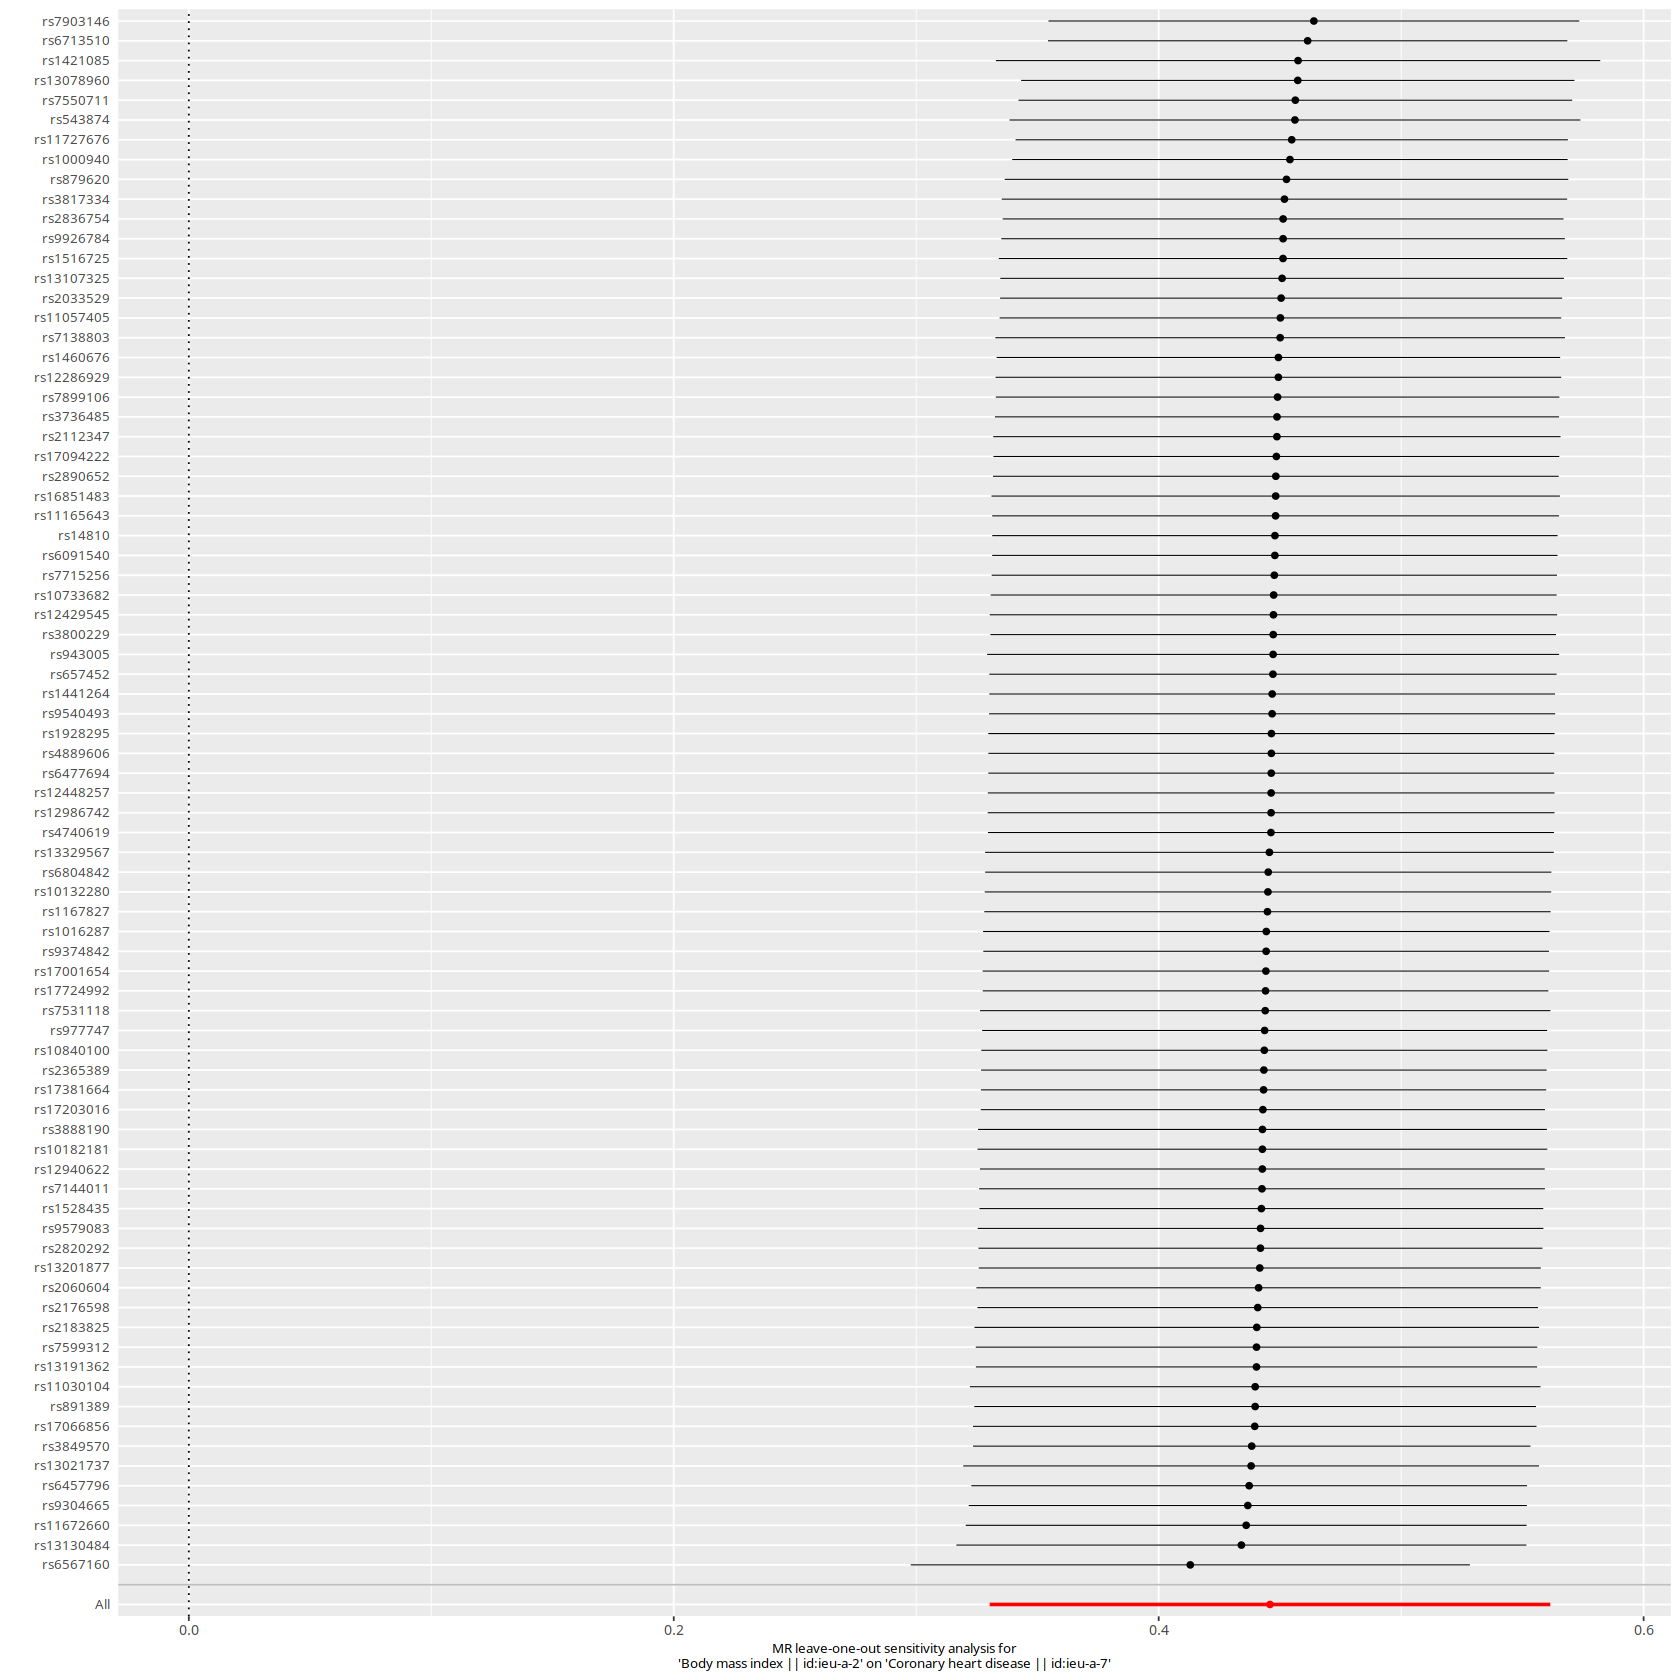

In [14]:
# Leave-one-out
res_loo <- mr_leaveoneout(dat)
mr_leaveoneout_plot(res_loo)




- **Y-axis**: SNPs that were left out  
- **X-axis**: Re-estimated causal effect $ \hat\beta_{(-j)} $  
- **Points ± CI**: The IVW estimate when that SNP is omitted  
- A **vertical reference line** marks the full IVW estimate using all SNPs


**Question:**
1. **Influential SNPs**  
   - Which SNP(s) cause the largest change in the causal estimate?  
   - What might explain their influence?

2. **Robustness**  
   - Does leaving any SNP out change the *direction* of the causal effect or only its magnitude?  
   - What does this say about the robustness of your MR conclusion?

3. **Follow-up Actions**  
   - If one SNP is clearly influential, how could you test whether it is pleiotropic?  
   - Would you exclude it, or use a pleiotropy-robust method instead?


#### Funnel Plot: Assessing Asymmetry and Pleiotropy

We generate a **funnel plot** to visually assess potential **horizontal pleiotropy** in the MR estimates from individual SNPs.


$`ieu-a-2.ieu-a-7`

attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  id.exposure id.outcome
1     ieu-a-2    ieu-a-7

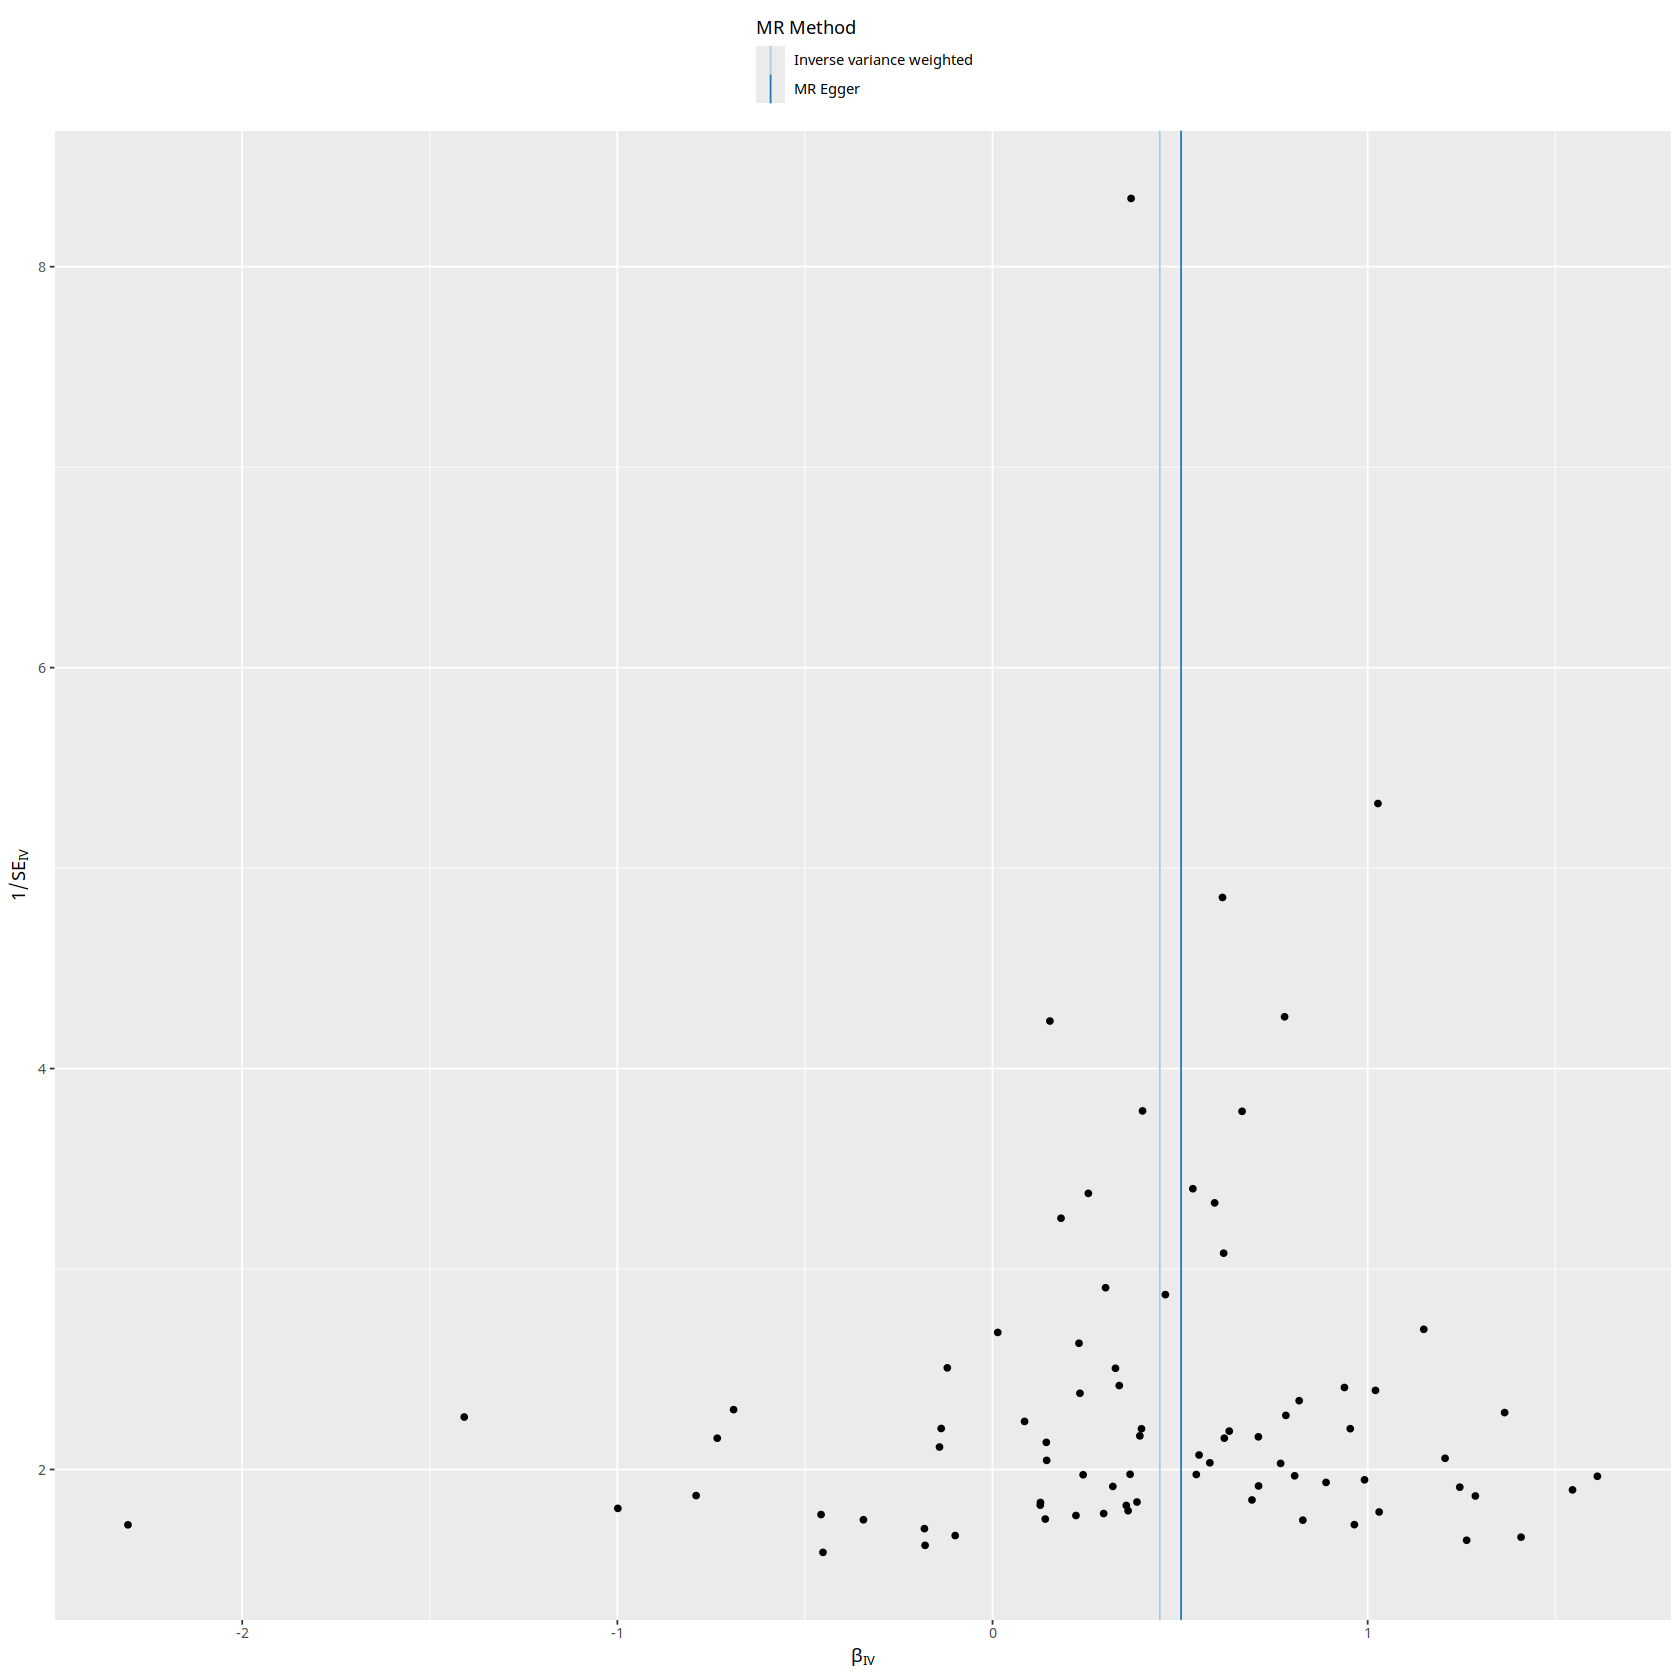

In [15]:

# Funnel plot
res_single <- mr_singlesnp(dat)
mr_funnel_plot(res_single)



- Each point represents the **Wald ratio** estimate from a single SNP:
  $
  \hat\beta_j = \frac{\beta_{Yj}}{\beta_{Xj}}
  $
- The **X-axis** shows the causal effect estimate.
- The **Y-axis** shows the **precision** of the estimate — usually:
  $
  \text{Precision} = \frac{1}{\text{SE of } \hat\beta_j}
  $

This plot resembles a classic **funnel plot from meta-analysis**, used to detect **asymmetry**.

#### How to interpret the funnel plot

| Pattern                          | Interpretation                                         |
|----------------------------------|--------------------------------------------------------|
| Symmetric funnel                | No evidence of directional pleiotropy                 |
| Asymmetric funnel (skewed)      | Possible **directional pleiotropy** or outlier SNPs   |
| Wide spread at bottom           | Low-precision SNPs contribute noisy estimates         |

If the SNP estimates are symmetrically scattered around the pooled effect (e.g. IVW), it suggests the absence of systematic bias.



**Question:**
1. **Visual asymmetry**  
   - Do you see any skew in the plot? Are points mostly clustered on one side?

2. **Interpretation**  
   - What would an asymmetric funnel suggest about your instruments?



# Extra

In [16]:
## IVW and het test "by hand"
bx  <- dat$beta.exposure          # SNP–exposure effects  (βXj)
by  <- dat$beta.outcome           # SNP–outcome effects   (βYj)
seY <- dat$se.outcome             # SE of βYj             (SEYj)


# 2.  IVW causal estimate ----------------------------------------------------
ivw_model <- lm(by ~ bx - 1, weights = 1 / seY^2)
beta_IVW <- coef(ivw_model)
se_IVW   <- sqrt(vcov(ivw_model))

# 3.  Cochran’s Q ------------------------------------------------------------
resid <- by - bx * beta_IVW
Q <- sum((resid^2) / seY^2)

# 4.  Degrees of freedom & p‑value ------------------------------------------
df    <- length(bx) - 1
Q_p   <- pchisq(Q, df = df, lower.tail = FALSE)

# 5.  Display results --------------------------------------------------------
cat("Cochran’s Q:", round(Q, 2), "\nDF:", df,
    "\nP‑value:", signif(Q_p, 3),
    "\n beta_IVW",beta_IVW,"\n")

Cochran’s Q: 143.65 
DF: 78 
P‑value: 8.73e-06 
 beta_IVW 0.4459091 
